**Image Binary Classification Part 2**

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5213 - loss: 1.7515 - val_accuracy: 0.4118 - val_loss: 0.9560
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4958 - loss: 1.8544 - val_accuracy: 0.5882 - val_loss: 1.7085
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4961 - loss: 1.2601 - val_accuracy: 0.5882 - val_loss: 1.4600
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6727 - loss: 0.8329 - val_accuracy: 0.3529 - val_loss: 0.8341
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6434 - loss: 0.6065 - val_accuracy: 0.5882 - val_loss: 1.2148
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7237 - loss: 0.5400 - val_accuracy: 0.5294 - val_loss: 0.8785
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6688 - loss: 0.6572 - val_accuracy: 0.5882 - val_loss: 0.7815
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7687 - loss: 0.5530 - val_accuracy: 0.5882 - val_loss: 1.0496


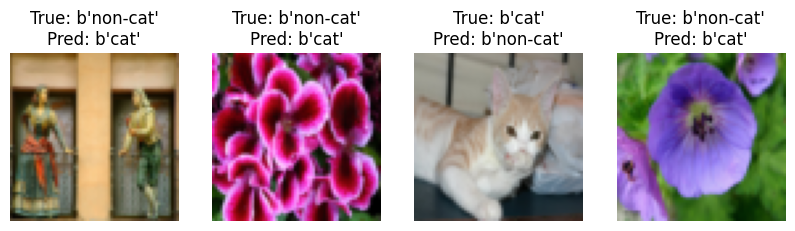

In [5]:
"""
Cat vs Non-Cat Image Classification using Neural Networks
This script implements a deep learning model to classify images as either cats or non-cats.
It uses a simple neural network architecture with dense layers for binary classification.
"""

import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def load_dataset():
    """
    Loads the cat vs non-cat dataset from H5 file.

    Returns:
        tuple: Contains:
            - train_set_x_orig: Training images array of shape (m, height, width, channels)
            - train_set_y_orig: Training labels array of shape (1, m)
            - classes: Array containing class labels ['non-cat', 'cat']
    """
    train_dataset = h5py.File('train_catvnoncat.h5', "r")

    # Extract training features and reshape them appropriately
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # training set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # training set labels

    # Get the list of classes
    classes = np.array(train_dataset["list_classes"][:])

    # Reshape labels to match expected dimensions
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, classes

def preprocess_data(train_x, train_y):
    """
    Preprocesses the input data by normalizing features and converting labels to one-hot encoding.

    Args:
        train_x (np.array): Input features
        train_y (np.array): Input labels

    Returns:
        tuple: Preprocessed features and labels
    """
    # Normalize pixel values to range [0,1]
    train_x = train_x / 255.0
    # Convert labels to one-hot encoding
    train_y = to_categorical(train_y.T, num_classes=2)

    return train_x, train_y

def build_model(input_shape):
    """
    Creates and compiles the neural network model.

    Args:
        input_shape (tuple): Shape of input images (height, width, channels)

    Returns:
        Sequential: Compiled Keras model
    """
    model = Sequential([
        Flatten(input_shape=input_shape),           # Flatten the input image
        Dense(128, activation='relu'),              # First hidden layer
        Dense(64, activation='relu'),               # Second hidden layer
        Dense(2, activation='softmax')              # Output layer for binary classification
    ])
    # Compile model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and prepare the dataset
train_x_orig, train_y_orig, classes = load_dataset()

# Configure dataset size based on student ID
student_id_last_digit = 1
new_train_size = 160 + student_id_last_digit

# Split data into training and test sets
new_train_x_orig = train_x_orig[:new_train_size]
new_train_y_orig = train_y_orig[:, :new_train_size]
new_test_x_orig = train_x_orig[new_train_size:]
new_test_y_orig = train_y_orig[:, new_train_size:]

# Preprocess both training and test data
new_train_x, new_train_y = preprocess_data(new_train_x_orig, new_train_y_orig)
new_test_x, new_test_y = preprocess_data(new_test_x_orig, new_test_y_orig)

# Initialize and train the model
model = build_model(new_train_x.shape[1:])
model.fit(new_train_x, new_train_y, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate model performance
train_loss, train_accuracy = model.evaluate(new_train_x, new_train_y, verbose=0)
test_loss, test_accuracy = model.evaluate(new_test_x, new_test_y, verbose=0)

# Print model performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and identify misclassifications
predictions = model.predict(new_test_x)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(new_test_y, axis=1)

# Find indices of incorrect predictions
incorrect_indices = np.where(predicted_classes != true_classes)[0]
print(f"Incorrectly classified indices: {incorrect_indices}")

def display_images(images, indices, true_labels, predicted_labels, classes, num_images=4):
    """
    Displays misclassified images with their true and predicted labels.

    Args:
        images (np.array): Array of images
        indices (np.array): Indices of images to display
        true_labels (np.array): True class labels
        predicted_labels (np.array): Predicted class labels
        classes (np.array): Array of class names
        num_images (int): Number of images to display (default: 4)
    """
    plt.figure(figsize=(10, 10))
    for i, index in enumerate(indices[:num_images]):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index])
        plt.title(f"True: {classes[true_labels[index]]}\nPred: {classes[predicted_labels[index]]}")
        plt.axis('off')
    plt.show()

# Display misclassified images
display_images(new_test_x_orig, incorrect_indices, true_classes, predicted_classes, classes)
